In [1]:
from knowknow import *
db = Dataset('sociology-wos-74b')

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk
loading variable sociology-wos-74b/_attributes from disk


In [2]:
db.groupings.append([
    'c',{
        'Bohrnstedt, G.|1969|sociol methodol,v1,p113':'Bohrnstedt, G.|1969|sociol methodol,v1,p113',
        'Bohrnstedt, G.|sociol methodol':'Bohrnstedt, G.|1969|sociol methodol,v1,p113'
    }
])

In [3]:
td = require('stats/top_decade_stratified')

In [4]:
db.set_attribute('RELIABLE_DATA_STARTS_HERE', 1960)

In [5]:
dfs = {
    key: db.load_variable('%s.births_deaths' % key)
    for key in ['c','fa','ta']
}

loading variable sociology-wos-74b/c.births_deaths from disk
loading variable sociology-wos-74b/fa.births_deaths from disk
loading variable sociology-wos-74b/ta.births_deaths from disk


In [6]:
typ = 'c'
dfc = dfs[typ]
dfc = dfc[dfc['first'] == 1980]

In [7]:
typ = 'ta'
dfa = dfs[typ]
dfa = dfa[dfa['first'] == 1980]

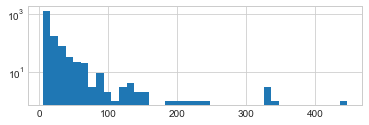

In [8]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

dfc.total.hist(bins=40, ax=ax)
ax.set_yscale('log')

In [9]:
def first5(x):
    i,x = x
    t = db.trend('c', x['name'])
    return sum(t.cits(t.first)[:5])

y = list(map(first5, dfc.iterrows()))

dfc['first5'] = y

loading variable sociology-wos-74b/ind ___ c.fy from disk
loading variable sociology-wos-74b/ind ___ fy from disk


c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
def first5(x):
    i,x = x
    t = db.trend('ta', x['name'])
    return sum(t.cits(t.first)[:5])

y = list(map(first5, dfa.iterrows()))

dfa['first5'] = y

loading variable sociology-wos-74b/ind ___ fy.ta from disk


c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
num1 = np.ceil( dfc.first5.quantile(0.9) )
num2 = np.ceil( dfa.first5.quantile(0.9) )

In [12]:
args = [('c', 'cited works'), ('ta', 'cited authors')]

In [13]:
strin = ""
for typ, name in args:
    df = dfs[typ]
    df = df[df['first'] == 1980]
    
    def first5(x):
        i,x = x
        t = db.trend(typ, x['name'])
        return sum(t.cits(t.first)[:5])

    y = list(map(first5, df.iterrows()))
    df['first5'] = y
    
    df = df[df['first5'] >= df.first5.quantile(0.9)]

    n1 = df.shape[0]
    n3 = df[df.death3>0].shape[0] / n1
    n4 = df[df.death1>0].shape[0] / n1
    n5 = df[df.death0>0].shape[0] / n1

    strin += """Of the {n1:,} {name} in the top 10% of the 1980 cohort, 
        {n3:0.0%} have died (β = 0.3),
        {n4:0.0%} have died (β = 0.1),
        and {n5:0.0%} have had a total academic death (β = 0). """.format(**locals())

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [14]:
display(Markdown("""
If we look at the *best* of those born in 1980, 
    those works and authors which in the next ten years get in the top quintile citations among their cohort,
    these figures drop.
To place in the top 10%, a cited work born in 1980 needed to receive just {num1:0.0f} citations.
A cited author needs to receive just {num2:0.0f}.
{strin}
""".format(**locals())))


If we look at the *best* of those born in 1980, 
    those works and authors which in the next ten years get in the top quintile citations among their cohort,
    these figures drop.
To place in the top 10%, a cited work born in 1980 needed to receive just 8 citations.
A cited author needs to receive just 9.
Of the 170 cited works in the top 10% of the 1980 cohort, 
        80% have died (β = 0.3),
        47% have died (β = 0.1),
        and 29% have had a total academic death (β = 0). Of the 73 cited authors in the top 10% of the 1980 cohort, 
        33% have died (β = 0.3),
        16% have died (β = 0.1),
        and 8% have had a total academic death (β = 0). 


# top 1%

In [15]:
df_top_c = td(db, 'c', 0.01)
df_top_ta = td(db, 'ta', 0.01)

92 /8973 in the top 1.0% in 1960,1970 (92 total accumulated)
99 /9807 in the top 1.0% in 1961,1971 (105 total accumulated)
108 /10641 in the top 1.0% in 1962,1972 (117 total accumulated)
116 /11554 in the top 1.0% in 1963,1973 (130 total accumulated)
130 /12520 in the top 1.0% in 1964,1974 (145 total accumulated)
137 /13630 in the top 1.0% in 1965,1975 (156 total accumulated)
151 /14721 in the top 1.0% in 1966,1976 (174 total accumulated)
164 /15793 in the top 1.0% in 1967,1977 (190 total accumulated)
182 /17216 in the top 1.0% in 1968,1978 (212 total accumulated)
194 /18570 in the top 1.0% in 1969,1979 (227 total accumulated)
188 /18544 in the top 1.0% in 1970,1980 (240 total accumulated)
206 /19876 in the top 1.0% in 1971,1981 (262 total accumulated)
215 /21338 in the top 1.0% in 1972,1982 (285 total accumulated)
230 /22900 in the top 1.0% in 1973,1983 (310 total accumulated)
252 /24409 in the top 1.0% in 1974,1984 (338 total accumulated)
260 /25961 in the top 1.0% in 1975,1985 (353 

In [16]:
n1 = dfc.shape[0]
n2 = dfa.shape[0]

In [17]:
display(Markdown("""
This phenomenon, that death becomes less likely the better a work does,
    becomes dramatic if we look at the top 1%.
Because there were only {n1} new works cited in 1980 and {n2} new cited authors,
    in this cohort the top 1% is only a handful.
""".format(**locals())))


This phenomenon, that death becomes less likely the better a work does,
    becomes dramatic if we look at the top 1%.
Because there were only 1651 new works cited in 1980 and 686 new cited authors,
    in this cohort the top 1% is only a handful.


# using my special thingy

## cited works

In [18]:
x = td(db, 'c', yRange=(1960,1985), percentile=0.01)

101 /10096 in the top 1.0% in 1960,1970 (101 total accumulated)
110 /10905 in the top 1.0% in 1961,1971 (113 total accumulated)
118 /11722 in the top 1.0% in 1962,1972 (122 total accumulated)
131 /12607 in the top 1.0% in 1963,1973 (140 total accumulated)
139 /13541 in the top 1.0% in 1964,1974 (152 total accumulated)
147 /14627 in the top 1.0% in 1965,1975 (164 total accumulated)
161 /15697 in the top 1.0% in 1966,1976 (185 total accumulated)
172 /16747 in the top 1.0% in 1967,1977 (201 total accumulated)
182 /18146 in the top 1.0% in 1968,1978 (217 total accumulated)
201 /19465 in the top 1.0% in 1969,1979 (235 total accumulated)
204 /19439 in the top 1.0% in 1970,1980 (251 total accumulated)
213 /20733 in the top 1.0% in 1971,1981 (272 total accumulated)
225 /22164 in the top 1.0% in 1972,1982 (294 total accumulated)
242 /23699 in the top 1.0% in 1973,1983 (324 total accumulated)
252 /25175 in the top 1.0% in 1974,1984 (345 total accumulated)
270 /26685 in the top 1.0% in 1975,1985 

In [19]:
a = dfs['c'].set_index('name')
b = x.set_index('name')

In [20]:
comb_df = a.join(b, on='name', lsuffix='_b', rsuffix='_d', how='inner')

In [21]:
def death_filter(df):
    return (
        (df.death1 <df.first_added+25)&
        (df.death1 >0)&
        (df.death1 > df.first_added)
    )

In [22]:
died = comb_df[death_filter(comb_df)]
diedN1 = died.shape[0]
num1 = comb_df.shape[0]
p1 = diedN1 / num1

In [23]:
to_plot = sorted( died.index )
mark = {i: [row['death1']] for i,row in died.iterrows()}

In [24]:
len(to_plot)

22

In [25]:
diedN2 = comb_df[death_filter(comb_df)].shape[0]
num2 = comb_df.shape[0]
p2 = diedN2 / num2

In [26]:
#Of the 144 cited authors in the top 1% in some decade in 1960 – 1985, only 1.4% have died (β = 0.1). 

display(Markdown("""
Of the {num2} cited works in the top 1% in some decade in 1960 - 1985,
    only {diedN2} ({p2:0.1%}) would die (β = 0.1) in the next 15 years.
""".format(**locals())))


Of the 366 cited works in the top 1% in some decade in 1960 - 1985,
    only 22 (6.0%) would die (β = 0.1) in the next 15 years.


In [27]:
comb_df = a.join(b, on='name', lsuffix='_b', rsuffix='_d', how='outer')

In [28]:
def is_my_dead(xs):
    for i,x in xs:
        if x.isTop:
            continue
        if not( 1960 <= x['first_b'] <= 1975):
            continue

        if x.death1 > x['first_b']+25:
            yield False
        if x.death1 < 0:
            yield False

        yield True

In [29]:
TRY = list(is_my_dead( comb_df.iterrows() ))

In [30]:
n1 = sum(TRY)
n2 = len(TRY)
p = n1/n2

In [31]:
display(Markdown("""
For comparison, a cited work in the bottom 99% 
    which received its first citation in 1960-1975 
    had a {p:0.0%} chance of dying (β = 0.1) within 25 years of its first citation.
""".format(**locals())))


For comparison, a cited work in the bottom 99% 
    which received its first citation in 1960-1975 
    had a 77% chance of dying (β = 0.1) within 25 years of its first citation.


In [32]:
a = dfs['c']

In [33]:
a[a.name=='Alexander, K.|1974|am sociol rev,v39,p668']

,first,total,maxcount,maxcounty,name,isTop,death0,life1_avg0,rebirth1_5,death1,rebirth1_10,life1_avg1,rebirth3_10,death3,life1_avg3
603,1975,72,8,1976,"Alexander, K.|1974|am sociol rev,v39,p668",True,-1,1.756098,-1,1995,-1,3.05,-1,1990,3.733333


In [34]:
x[x.name=='Alexander, K.|1974|am sociol rev,v39,p668']

,maxpropy,maxcounty,maxcount,pub,last,maxprop,type,name,total,totalprop,first,first_added


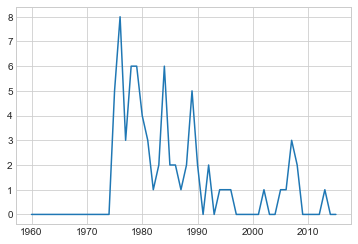

In [35]:
db.trend('c','Alexander, K.|1974|am sociol rev,v39,p668').show()

In [52]:
db.search('c','Davis, J.|')

loading variable sociology-wos-74b/ind ___ c from disk


['Davis, J.|1956|sociometry,v19,p154',
 'Davis, J.|1959|sociometry,v22,p280',
 'Davis, J.|1961|am sociol rev,v26,p215',
 'Davis, J.|1963|am j sociol,v68,p444',
 'Davis, J.|1966|am j sociol,v72,p17',
 'Davis, J.|1967|hum relat,v20,p181',
 'Davis, J.|1967|j am stat assoc,v62,p189',
 'Davis, J.|1970|am sociol rev,v35,p843',
 'Davis, J.|1971|am sociol rev,v36,p309',
 'Davis, J.|1972|man,v7,p408',
 'Davis, J.|1972|sociological theorie,v2',
 'Davis, J.|1975|am j sociol,v81,p491',
 'Davis, J.|1978|soc sci res,v7,p151',
 'Davis, J.|1978|teach sociol,v5,p235',
 'Davis, J.|1980|soc forces,v58,p1129',
 'Davis, J.|1981|soc indic res,v9,p395',
 'Davis, J.|1982|am sociol rev,v47,p569',
 'Davis, J.|1983|teach sociol,v10,p186',
 'Davis, J.|1984|soc indic res,v15,p319',
 'Davis, J.|1987|anthrozoos,v1,p90',
 'Davis, J.|1992|public opin quart,v56,p261',
 'Davis, J.|1994|sociol forum,v9,p179',
 'Davis, J.|2000|qualitative sociolog,v23,p29',
 'Davis, J.|2005|soc probl,v52,p529',
 'Davis, J.|accounts innoce

Aronowitz, S.|false promises
loading variable sociology-wos-74b/doc ___ c.fy from disk
loading variable sociology-wos-74b/doc ___ fy from disk
Bibb, R.|1977|soc forces,v55,p974
Blalock, H.|methodology social r
Boyle, R.|1970|am j sociol,v75,p461
Collins, R.|conflict sociology e
Costner, H.|1965|am sociol rev,v30,p341
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


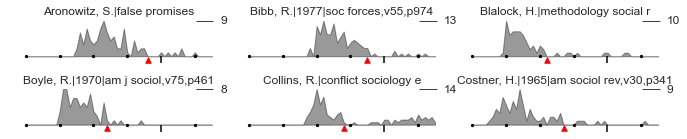

Davis, J.|sociol methodol
Dean, D.|1961|am sociol rev,v26,p753
Duncan, O.|1968|am j sociol,v74,p119
Edwards, R.|labor market segment
Goldberger, A.|econometric theory
Goodman, L.|1970|j am stat assoc,v65,p226
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


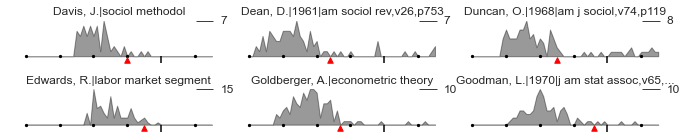

Goodman, L.|1972|am j sociol,v77,p1035
Goodman, L.|1972|am sociol rev,v37,p28
Kerlinger, F.|multiple regression
Kornhauser, W.|scientists industry
Labovitz, S.|1967|soc forces,v46,p151
Nie, N.|statistical package
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


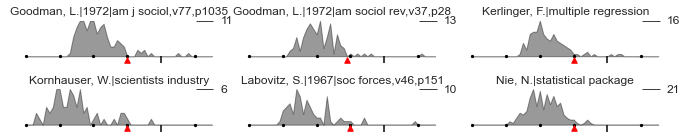

Parsons, T.|toward general theor
Rose, A.|theory method social
Stolzenberg, R.|1975|am sociol rev,v40,p645
Turner, R.|social context ambit
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


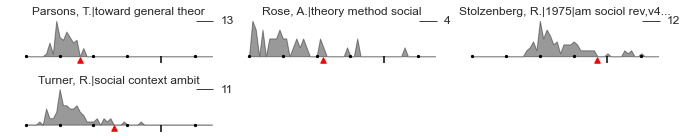

In [36]:
viz.yearly_counts(to_plot, db, myname='%s_deaths_01'%'c', markers=mark,ctype='c', cols=3)

Aronowitz, S.|false promises
Bibb, R.|1977|soc forces,v55,p974
Blalock, H.|methodology social r
Boyle, R.|1970|am j sociol,v75,p461
Collins, R.|conflict sociology e
Costner, H.|1965|am sociol rev,v30,p341
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


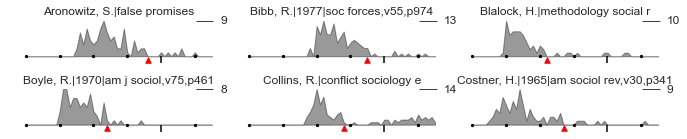

Davis, J.|sociol methodol
Dean, D.|1961|am sociol rev,v26,p753
Duncan, O.|1968|am j sociol,v74,p119
Edwards, R.|labor market segment
Goldberger, A.|econometric theory
Goodman, L.|1970|j am stat assoc,v65,p226
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


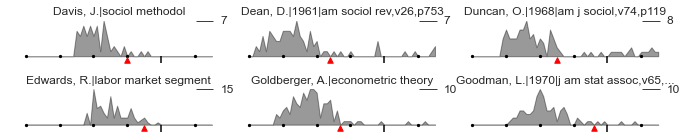

Goodman, L.|1972|am j sociol,v77,p1035
Goodman, L.|1972|am sociol rev,v37,p28
Kerlinger, F.|multiple regression
Kornhauser, W.|scientists industry
Labovitz, S.|1967|soc forces,v46,p151
Nie, N.|statistical package
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


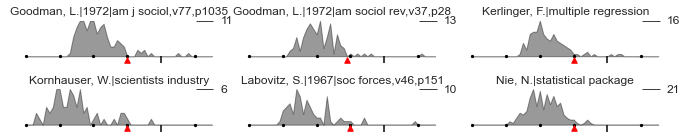

Parsons, T.|toward general theor
Rose, A.|theory method social
Stolzenberg, R.|1975|am sociol rev,v40,p645
Turner, R.|social context ambit
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


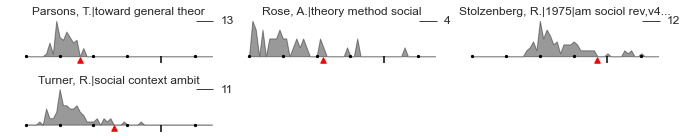

In [37]:
viz.yearly_counts(to_plot, db, myname='%s_deaths_01'%'c', markers=mark,ctype='c', cols=3)

In [38]:
for t in to_plot:
    s = ""
    if len(t.split("|"))==2:
        s = " worldcat"
    else:
        s = " apa cite"
    
    t = t.replace("|"," ")
    t = t.replace(",v"," ")
    t = t.replace(",p"," ")
    t = t.replace(","," ")
    
    t = t.replace("am ","american ")
    t = t.replace("anthr ","anthropolog ")
    t = t.replace("gen ","general ")
    t = t.replace("ed ","education ")
    t = t.replace("psychol ","psychology ")
    t = t.replace("soc ","social ")
    t = t.replace("sociol ", "sociology ")
    t = t.replace("ec ","economic ")
    t = t.replace("econ ","economy ")
    t = t.replace("hist ","history ")
    t = t.replace("j ","journal ")
    t = t.replace("int ","international ")
    t = t.replace("rev ","review ")
    t = t.replace("polit ","political ")
    
    print(t,s)

Aronowitz  S. false promises  worldcat
Bibb  R. 1977 social forces 55 974  apa cite
Blalock  H. methodology social r  worldcat
Boyle  R. 1970 american journal sociology 75 461  apa cite
Collins  R. conflict sociology e  worldcat
Costner  H. 1965 american sociology review 30 341  apa cite
Davis  J. sociology methodol  worldcat
Dean  D. 1961 american sociology review 26 753  apa cite
Duncan  O. 1968 american journal sociology 74 119  apa cite
Edwards  R. labor market segment  worldcat
Goldberger  A. econometric theory  worldcat
Goodman  L. 1970 journal american stat associal 65 226  apa cite
Goodman  L. 1972 american journal sociology 77 1035  apa cite
Goodman  L. 1972 american sociology review 37 28  apa cite
Kerlinger  F. multiple regression  worldcat
Kornhauser  W. scientists industry  worldcat
Labovitz  S. 1967 social forces 46 151  apa cite
Nie  N. statistical package  worldcat
Parsons  T. toward general theor  worldcat
Rose  A. theory method social  worldcat
Stolzenberg  R. 1975 am

In [39]:
len(to_plot)

22

# cited authors

In [40]:
y = td(db, 'ta', yRange=(1960,1985), percentile=0.01)

a = dfs['ta'].set_index('name')
b = y.set_index('name')

comb_df = a.join(b, on='name', lsuffix='_b', rsuffix='_d', how='inner')

46 /4457 in the top 1.0% in 1960,1970 (46 total accumulated)
48 /4792 in the top 1.0% in 1961,1971 (50 total accumulated)
52 /5146 in the top 1.0% in 1962,1972 (54 total accumulated)
56 /5532 in the top 1.0% in 1963,1973 (60 total accumulated)
61 /5926 in the top 1.0% in 1964,1974 (63 total accumulated)
65 /6406 in the top 1.0% in 1965,1975 (71 total accumulated)
69 /6854 in the top 1.0% in 1966,1976 (75 total accumulated)
73 /7298 in the top 1.0% in 1967,1977 (81 total accumulated)
79 /7872 in the top 1.0% in 1968,1978 (90 total accumulated)
84 /8388 in the top 1.0% in 1969,1979 (95 total accumulated)
86 /8393 in the top 1.0% in 1970,1980 (102 total accumulated)
90 /8921 in the top 1.0% in 1971,1981 (109 total accumulated)
96 /9512 in the top 1.0% in 1972,1982 (117 total accumulated)
101 /10095 in the top 1.0% in 1973,1983 (127 total accumulated)
108 /10638 in the top 1.0% in 1974,1984 (137 total accumulated)
112 /11178 in the top 1.0% in 1975,1985 (141 total accumulated)
(141, 10)


In [41]:
died = comb_df[
    (comb_df.death1 <comb_df.first_added+40)&
    (comb_df.death1 >0)&
    (comb_df.death1 > comb_df.first_added)
]

In [42]:
diedN2 = died.shape[0]
num2 = comb_df.shape[0]
p2 = diedN2 / num2

In [43]:
names = died.index
names = list(names)
names = ", ".join(names[:-1]) + " and " + names[-1]

In [44]:
died = comb_df[
    (comb_df.death3 <comb_df.first_added+40)&
    (comb_df.death3 >0)&
    (comb_df.death3 > comb_df.first_added)
]

In [57]:
diedN3 = died.shape[0]
num3 = comb_df.shape[0]
p3 = diedN3 / num3

In [58]:
#Of the 144 cited authors in the top 1% in some decade in 1960 – 1985, only 1.4% have died (β = 0.1). 

display(Markdown("""
Of the {num2} cited authors in the top 1% in some decade, 
    only {diedN2} ({p2:0.1%}) died (β = 0.1) in the next 30 years. 
These were {names}. 
Only {diedN3} ({p3:0.1%}) died (β = 0.3) in the next 30 years. 
""".format(**locals())))


Of the 141 cited authors in the top 1% in some decade, 
    only 3 (2.1%) died (β = 0.1) in the next 30 years. 
These were Kahl, J., Labovitz, S. and Poulantzas, N.. 
Only 24 (3.5%) died (β = 0.3) in the next 30 years. 


# top 5% cited authors

In [47]:
y = td(db, 'ta', yRange=(1960,1985), percentile=0.05)

a = dfs['ta'].set_index('name')
b = y.set_index('name')

comb_df = a.join(b, on='name', lsuffix='_b', rsuffix='_d', how='inner')

226 /4457 in the top 5.0% in 1960,1970 (226 total accumulated)
243 /4792 in the top 5.0% in 1961,1971 (252 total accumulated)
262 /5146 in the top 5.0% in 1962,1972 (275 total accumulated)
279 /5532 in the top 5.0% in 1963,1973 (303 total accumulated)
298 /5926 in the top 5.0% in 1964,1974 (331 total accumulated)
325 /6406 in the top 5.0% in 1965,1975 (357 total accumulated)
353 /6854 in the top 5.0% in 1966,1976 (386 total accumulated)
366 /7298 in the top 5.0% in 1967,1977 (412 total accumulated)
400 /7872 in the top 5.0% in 1968,1978 (450 total accumulated)
422 /8388 in the top 5.0% in 1969,1979 (475 total accumulated)
425 /8393 in the top 5.0% in 1970,1980 (500 total accumulated)
448 /8921 in the top 5.0% in 1971,1981 (532 total accumulated)
476 /9512 in the top 5.0% in 1972,1982 (565 total accumulated)
508 /10095 in the top 5.0% in 1973,1983 (604 total accumulated)
532 /10638 in the top 5.0% in 1974,1984 (640 total accumulated)
564 /11178 in the top 5.0% in 1975,1985 (687 total ac

In [53]:
died = comb_df[
    (comb_df.death1 <comb_df.first_added+30)&
    (comb_df.death1 >0)&
    (comb_df.death1 > comb_df.first_added)
]

In [49]:
comb_df.shape[0]

687

In [54]:
died.shape[0]

24

Alschuler, A.
loading variable sociology-wos-74b/doc ___ fy.ta from disk
Axelrod, M.
Bernstein, I.
Bibb, R.
Bonjean, C.
Boyle, R.
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


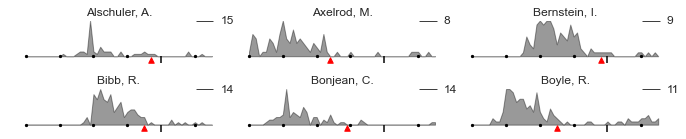

Cartter, A.
Dean, D.
Friedrichs, R.
Goldsen, R.
Hamblin, R.
Horton, J.
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


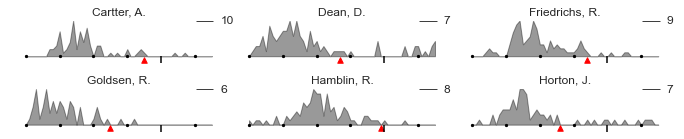

Loomis, C.
Neal, A.
Nettler, G.
Reissman, L.
Roszak, T.
Schmidt, S.
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


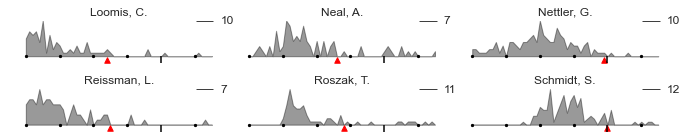

Selvin, H.
Sheldon, E.
Somers, R.
Svalastoga, K.
Tyree, A.
Werts, C.
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


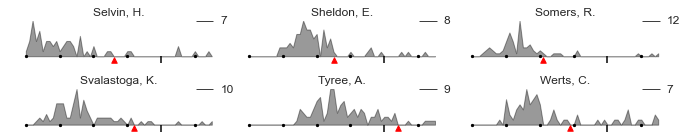

In [51]:
died = comb_df[
    (comb_df.death1 <comb_df.first_added+30)&
    (comb_df.death1 >0)&
    (comb_df.death1 > comb_df.first_added)
]
to_plot = sorted( died.index )
mark = {i: [x['death1']] for i,x in died.iterrows()}

viz.yearly_counts(to_plot, db, myname='%s_deaths_01'%'ta', markers=mark,ctype='ta', cols=3)

# trash

```python
df = dfs['c']

df = df[df['first'] <= 1985]

def first5(x):
    i,x = x
    t = db.trend('c', x['name'])
    return sum(t.cits(t.first)[:5])

df['first5'] = list(map(first5, df.iterrows()))

Xa = []
Xb = []
Ya = []
Yb = []

for YY in range(1960,1985):
    coh = df[df['first'] == YY]
    top_01 = np.ceil(coh.first5.quantile(0.99))
    
    ctop = coh[coh.first5 >= top_01]
    cntop = coh[coh.first5 < top_01]
    
    dtop = ctop[(ctop.death1 < YY+20)&(ctop.death1 >= 0)]
    pdc = dtop.shape[0] / ctop.shape[0]
    
    Xa.append(dtop.shape[0])
    Xb.append(ctop.shape[0])
    
    dntop = cntop[(cntop.death1 < YY+20)&(cntop.death1 >= 0)]
    pdcn = dntop.shape[0] / cntop.shape[0]
    
    Ya.append(dntop.shape[0])
    Yb.append(cntop.shape[0])

n1 = sum(Xa) / sum(Xb)
n2 = sum(Ya) / sum(Yb)

display(Markdown("""
{n1:0.0%} of the top 1% in their cohort die (β = 0.1) within 20 years, 
    compared to {n2:0.0%} among the bottom 99%.
""".format(**locals())))
```